In [2]:
import pandas as pd
import numpy as np

In [8]:
file_endings = "GSE89093"

In [3]:
train = pd.read_csv(f"../champ_result/GSE89093.csv")

In [4]:
train_value = train.iloc[:, 1:]
train_value.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.486644,0.472790,0.440157,0.401009,0.403449,0.453738,0.505430,0.525945,0.539579,0.378885,...,0.586559,0.557733,0.515352,0.570047,0.586289,0.428182,0.410767,0.535594,0.561125,0.534982
1,0.989213,0.993538,0.991012,0.995878,0.996242,0.992823,0.990628,0.992809,0.999285,0.998130,...,0.980657,0.994747,0.987606,0.994711,0.982437,0.982954,0.994045,0.987665,0.993932,0.991112
2,0.984875,0.951471,0.948615,0.949571,0.963231,0.972137,0.972501,0.969343,0.950113,0.964967,...,0.966235,0.960497,0.955022,0.955616,0.936133,0.955798,0.937965,0.965013,0.942853,0.945216
3,0.102033,0.168589,0.158073,0.141595,0.124284,0.179538,0.181141,0.198009,0.171876,0.160247,...,0.164425,0.146259,0.162503,0.170724,0.151290,0.113963,0.176928,0.133602,0.147707,0.166224
4,0.798909,0.720664,0.745585,0.751120,0.738786,0.777767,0.776491,0.839313,0.830973,0.844176,...,0.795153,0.799779,0.796590,0.831788,0.794952,0.783985,0.720944,0.756649,0.848983,0.820339


In [5]:
phe = pd.read_csv('../champ_result/GSE89093_phenotype.csv')
mask = phe['cancer_status'] == 'healthy'

In [6]:
train_normal = train_value.iloc[:,mask.values]
train_tumor = train_value.iloc[:,~mask.values]
train_normal = train_normal.T.reset_index(drop=True).T
train_tumor = train_tumor.T.reset_index(drop=True).T

In [7]:
# train_normal
train_tumor

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.472790,0.403449,0.505430,0.525945,0.539579,0.464132,0.492984,0.525121,0.486808,0.565316,...,0.513869,0.552794,0.628597,0.554975,0.547020,0.586559,0.557733,0.570047,0.561125,0.534982
1,0.993538,0.996242,0.990628,0.992809,0.999285,0.993763,0.994670,0.991957,0.996651,0.988120,...,0.984695,0.989146,0.981003,0.989343,0.987200,0.980657,0.994747,0.994711,0.993932,0.991112
2,0.951471,0.963231,0.972501,0.969343,0.950113,0.952831,0.944027,0.936234,0.980138,0.905291,...,0.956056,0.957927,0.927795,0.927532,0.965320,0.966235,0.960497,0.955616,0.942853,0.945216
3,0.168589,0.124284,0.181141,0.198009,0.171876,0.185253,0.177354,0.205393,0.120393,0.172133,...,0.160116,0.259007,0.250401,0.315281,0.205794,0.164425,0.146259,0.170724,0.147707,0.166224
4,0.720664,0.738786,0.776491,0.839313,0.830973,0.776097,0.718977,0.770946,0.831703,0.804111,...,0.798206,0.869732,0.716751,0.857617,0.759182,0.795153,0.799779,0.831788,0.848983,0.820339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453622,0.017480,0.010956,0.009306,0.008481,0.001029,0.011709,0.008435,0.004261,0.004014,0.003202,...,0.003955,0.011066,0.012789,0.010466,0.016935,0.007897,0.004232,0.011549,0.016102,0.007668
453623,0.016064,0.004903,0.011053,0.009776,0.004001,0.016080,0.010604,0.006520,0.005961,0.009472,...,0.004420,0.006694,0.019083,0.019029,0.012968,0.010352,0.012666,0.008783,0.012630,0.017469
453624,0.025162,0.020435,0.012570,0.012651,0.001225,0.010856,0.012147,0.001945,0.009508,0.010087,...,0.014719,0.020208,0.043012,0.022159,0.013641,0.014115,0.024711,0.023771,0.032479,0.032993
453625,0.062762,0.059940,0.098019,0.132013,0.001345,0.091215,0.027082,0.055965,0.013220,0.043563,...,0.191182,0.213528,0.209121,0.209367,0.147617,0.135202,0.047782,0.072900,0.080214,0.182504


##### Calculate Δβ

In [14]:
# remove outlier based on every column
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + IQR*1.5
    lower_fence = Q1 - IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence, lower_fence = IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [15]:
train_normal = no_outlier(train_normal)
train_tumor = no_outlier(train_tumor)

In [16]:
train_normal_avg = train_normal.mean(skipna=True, axis = 0)

In [17]:
train_tumor=(train_tumor).subtract(train_normal_avg, axis = 1)

In [18]:
train_tumor=no_outlier(train_tumor)

In [19]:
train_tumor_mean = train_tumor.mean(skipna=True, axis = 1)

In [20]:
dbeta = pd.merge(train.iloc[:,:1], pd.DataFrame(train_tumor_mean, columns = ["dbeta"]), left_index=True, right_index=True)
dbeta

,ID_REF,dbeta
0,cg00000029,0.000617
1,cg00000108,0.460553
2,cg00000109,0.425928
3,cg00000165,-0.331980
4,cg00000236,0.272426
...,...,...
453622,ch.9.98463211R,-0.519415
453623,ch.9.98937537R,-0.517219
453624,ch.9.98957343R,-0.509196
453625,ch.9.98959675F,-0.419874


In [21]:
# rename ID_REF to ID
dbeta.rename(columns={"ID_REF": "ID"}, inplace=True)

Text(0.5, 1.0, 'Density plot of delta Beta value')

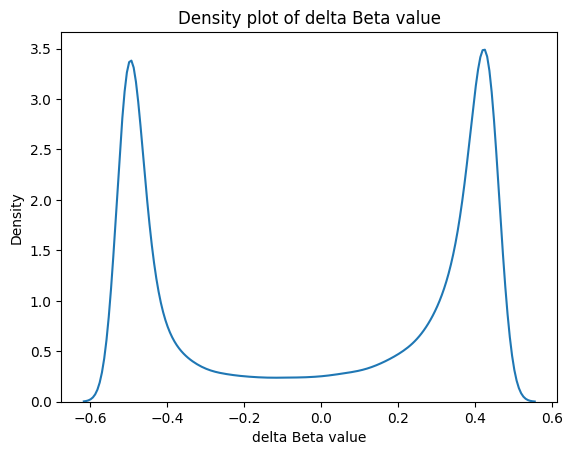

In [22]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(dbeta['dbeta'], label='healthy')
plt.xlabel('delta Beta value')
plt.title('Density plot of delta Beta value')

In [35]:
GPL13534 = pd.read_csv("../external_result\GPL13534-11288.txt", sep="\t")

C:\Users\Vincent\AppData\Local\Temp\ipykernel_22120\3982612043.py:1: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  GPL13534 = pd.read_csv("../external_result\GPL13534-11288.txt", sep="\t")


In [36]:
GPL13534

,ID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,RANGE_START,RANGE_END,RANGE_GB,SPOT_ID
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,NaN,NaN,II,NaN,NaN,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,...,NaN,NaN,NaN,NaN,NaN,NaN,8553009.0,8553132.0,NC_000024.9,NaN
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,31717405.0,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,...,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN,9363356.0,9363479.0,NC_000024.9,NaN
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,...,NaN,NaN,NaN,NaN,NaN,NaN,25314171.0,25314294.0,NC_000024.9,NaN
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,...,NaN,NaN,NaN,NaN,NaN,NaN,22741795.0,22741918.0,NC_000024.9,NaN
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,...,NaN,NaN,NaN,NaN,NaN,NaN,21664296.0,21664419.0,NC_000024.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs7746156,rs7746156,33622366,TACCAACCAATACTCAAAATAACCCATACTAATCTTCCTATTCTTC...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs7746156
485573,rs1945975,rs1945975,23614475,CCACTTCTCTTTCCTCACCTACTTTCATTTAATTTAATACTTACCT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1945975
485574,rs966367,rs966367,16795360,ATAACTCCTTTAACTTTAAACACACATCTCTACACACAACCACATA...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs966367
485575,rs877309,rs877309,54760445,CCCCAACCCAAAACCTCTATAATTCACAAAACACAAATTCACACTT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs877309


In [37]:
GPL13534 = GPL13534[["ID", "UCSC_RefGene_Name"]]
GPL13534.dropna(inplace=True)
GPL13534

C:\Users\Vincent\AppData\Local\Temp\ipykernel_22120\1951169128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPL13534.dropna(inplace=True)


,ID,UCSC_RefGene_Name
0,cg00035864,TTTY18
1,cg00050873,TSPY4;FAM197Y2
2,cg00061679,DAZ1;DAZ4;DAZ4
3,cg00063477,EIF1AY
4,cg00121626,BCORL2
...,...,...
485501,ch.22.734399R,EP300
485502,ch.22.740407F,RANGAP1
485503,ch.22.757911F,XRCC6
485504,ch.22.772318F,NAGA


In [38]:
result = pd.merge(dbeta, GPL13534, on="ID", how="inner")
result

,ID,dbeta,UCSC_RefGene_Name
0,cg00000029,0.000617,RBL2
1,cg00000108,0.460553,C3orf35;C3orf35
2,cg00000109,0.425928,FNDC3B;FNDC3B
3,cg00000236,0.272426,VDAC3;VDAC3
4,cg00000289,0.203034,ACTN1;ACTN1;ACTN1
...,...,...,...
344527,ch.9.377428R,-0.505897,ACER2
344528,ch.9.691424R,-0.510681,RNF38;RNF38;RNF38;RNF38;RNF38
344529,ch.9.837340R,-0.518281,PTAR1
344530,ch.9.898515R,-0.509588,TMC1


In [39]:
result.dropna(inplace=True)
result

,ID,dbeta,UCSC_RefGene_Name
0,cg00000029,0.000617,RBL2
1,cg00000108,0.460553,C3orf35;C3orf35
2,cg00000109,0.425928,FNDC3B;FNDC3B
3,cg00000236,0.272426,VDAC3;VDAC3
4,cg00000289,0.203034,ACTN1;ACTN1;ACTN1
...,...,...,...
344527,ch.9.377428R,-0.505897,ACER2
344528,ch.9.691424R,-0.510681,RNF38;RNF38;RNF38;RNF38;RNF38
344529,ch.9.837340R,-0.518281,PTAR1
344530,ch.9.898515R,-0.509588,TMC1


In [40]:
result['UCSC_RefGene_Name'] = result['UCSC_RefGene_Name'].str.split(';').str[0]
result

,ID,dbeta,UCSC_RefGene_Name
0,cg00000029,0.000617,RBL2
1,cg00000108,0.460553,C3orf35
2,cg00000109,0.425928,FNDC3B
3,cg00000236,0.272426,VDAC3
4,cg00000289,0.203034,ACTN1
...,...,...,...
344527,ch.9.377428R,-0.505897,ACER2
344528,ch.9.691424R,-0.510681,RNF38
344529,ch.9.837340R,-0.518281,PTAR1
344530,ch.9.898515R,-0.509588,TMC1


In [41]:
def find_max_dBeta_grouped(group):
    idx_max = group['dbeta'].abs().idxmax()
    return group.loc[idx_max]

result_max_per_gene = result.groupby("UCSC_RefGene_Name").apply(find_max_dBeta_grouped).reset_index(drop=True)

C:\Users\Vincent\AppData\Local\Temp\ipykernel_22120\563322187.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_max_per_gene = result.groupby("UCSC_RefGene_Name").apply(find_max_dBeta_grouped).reset_index(drop=True)


In [42]:
single = pd.read_csv('../comorbidity/matchgene174_single_3Y10__OR2.txt', sep='\t', header=None)

In [43]:
result_max_per_gene_single = result_max_per_gene[result_max_per_gene['UCSC_RefGene_Name'].isin(single[0])]
result_max_per_gene_single

,ID,dbeta,UCSC_RefGene_Name
1,cg24411946,0.437420,A1CF
4,cg12187098,0.457264,A2M
5,cg27629124,0.454412,A2ML1
12,cg12136764,0.446438,AADAC
16,cg14239811,-0.509131,AADAT
...,...,...,...
19352,cg11216845,-0.518666,ZNRD1
19355,cg03456872,-0.512381,ZNRF3
19372,cg22031998,-0.510732,ZSCAN18
19392,cg01021053,-0.510307,ZWINT


In [10]:
file_endings

'GSE89093'

In [27]:
result_max_per_gene_single.to_csv(f"../result/result_max_per_gene_single_{file_endings}.csv", index=False)

In [9]:
result_max_per_gene_single = pd.read_csv(f"../result/result_max_per_gene_single_GSE89093.csv")

In [10]:
dbeta_process_liquid = result_max_per_gene_single.copy()
dbeta_process_liquid

,ID,dbeta,UCSC_RefGene_Name
0,cg24411946,0.437420,A1CF
1,cg12187098,0.457264,A2M
2,cg27629124,0.454412,A2ML1
3,cg12136764,0.446438,AADAC
4,cg14239811,-0.509131,AADAT
...,...,...,...
8119,cg11216845,-0.518666,ZNRD1
8120,cg03456872,-0.512381,ZNRF3
8121,cg22031998,-0.510732,ZSCAN18
8122,cg01021053,-0.510307,ZWINT


In [11]:
result_max_per_gene_single = pd.read_csv(f"../result/result_max_per_gene_single_train.csv")

In [12]:
dbeta_process_tissue = result_max_per_gene_single.copy()
dbeta_process_tissue.columns = ['ID', 'dbeta', 'UCSC_RefGene_Name']
dbeta_process_tissue

,ID,dbeta,UCSC_RefGene_Name
0,cg00134295,0.207143,A2M
1,cg15769388,-0.143162,A2ML1
2,cg13001012,-0.056940,AADAC
3,cg00150882,0.157614,AADAT
4,cg20940607,0.009114,AAGAB
...,...,...,...
7863,cg07135797,-0.288723,ZNRD1
7864,cg20080983,-0.261198,ZNRF3
7865,cg14231297,0.401591,ZSCAN18
7866,cg14642833,-0.018417,ZWINT


In [13]:
# intersect between liquid and tissue
interseted = pd.merge(dbeta_process_liquid, dbeta_process_tissue, on="ID", how="inner")
interseted = interseted[(interseted['dbeta_x'] * interseted['dbeta_y']) > 0]
interseted = interseted.drop(columns=['UCSC_RefGene_Name_y'])
interseted = interseted.rename(columns={'UCSC_RefGene_Name_x': 'UCSC_RefGene_Name'})
interseted = interseted.rename(columns={'dbeta_x': 'dbeta_liquid'})
interseted = interseted.rename(columns={'dbeta_y': 'dbeta_tissue'})
interseted = interseted[['ID', 'UCSC_RefGene_Name', 'dbeta_liquid', 'dbeta_tissue']]
interseted

,ID,UCSC_RefGene_Name,dbeta_liquid,dbeta_tissue
0,cg14019757,ABCA10,-0.422094,-0.091622
4,cg08423507,ACR,0.429576,0.163674
7,cg24329783,ADAMTS4,0.033987,0.034141
11,cg22199080,AGAP2,-0.522497,-0.189013
14,cg07044282,ANGPTL1,0.327823,0.145045
...,...,...,...,...
320,cg01114951,TRIM45,-0.513670,-0.017902
322,cg08191854,TRPM2,-0.505133,-0.225745
327,cg15559700,UGT1A9,0.456121,0.000410
330,cg08357601,UTP3,-0.519395,-0.015730


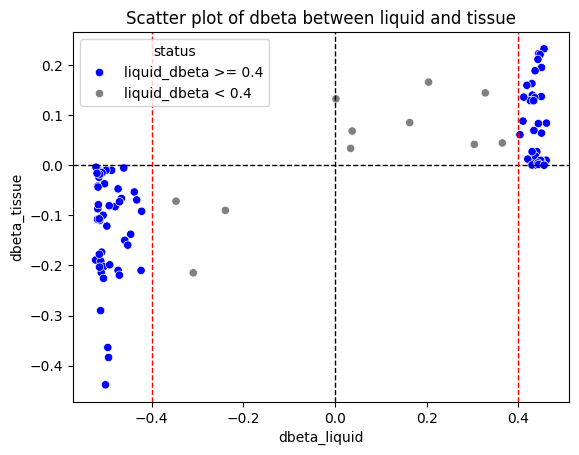

In [14]:
# draw scatter plot for liquid and tissue
import matplotlib.pyplot as plt
import seaborn as sns
interseted['status'] = np.where(abs(interseted['dbeta_liquid']) < 0.4, 'liquid_dbeta < 0.4', 'liquid_dbeta >= 0.4')

sns.scatterplot(
    data=interseted,
    x='dbeta_liquid',
    y='dbeta_tissue',
    hue='status',
    palette=['blue', 'gray'])
plt.xlabel('dbeta_liquid')
plt.ylabel('dbeta_tissue')
plt.title('Scatter plot of dbeta between liquid and tissue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0.4, color='red', linewidth=1, linestyle='--')
plt.axvline(-0.4, color='red', linewidth=1, linestyle='--')
plt.show()

In [15]:
interseted = interseted[interseted['dbeta_liquid'] >= 0.4]
interseted = interseted.drop(columns=['status'])
print(interseted.shape)
interseted

(37, 4)


,ID,UCSC_RefGene_Name,dbeta_liquid,dbeta_tissue
4,cg08423507,ACR,0.429576,0.163674
15,cg21223353,ANGPTL7,0.452720,0.004672
32,cg00000108,C3orf35,0.460553,0.010434
38,cg07634706,CCL17,0.440156,0.027782
60,cg16885093,CSHL1,0.410040,0.088584
61,cg04775505,CSN3,0.403428,0.061389
71,cg09914773,CYP3A4,0.442439,0.003644
72,cg06459378,CYP3A7,0.436475,0.000682
77,cg20202112,DCTN1,0.450453,0.195690
80,cg19544031,DTX2,0.432360,0.008102


In [17]:
interseted.to_csv(f"../result/interseted_.csv", index=False)